In [80]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (8.0, 10.0)


In [81]:
dataDir='/Users/azakaria/Downloads'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [82]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.10s)
creating index...
index created!


In [83]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]

In [84]:
catIds = coco.getCatIds();
def get_img_ids_for_training(catIds):
    imgIds = []
    for catId in catIds:
        imgIds_current_batch = coco.getImgIds(catIds=[catId])[:30]
        if(len(imgIds_current_batch) < 30):
            print('ERROR! Not 30 images in this category!')
        imgIds = imgIds + imgIds_current_batch
        #annIds = annIds + coco.getAnnIds(imgIds = imgIds) #I may need to include cat ids like in the example
        #anns = coco.loadAnns(annIds)
    return imgIds

In [85]:
"""
# get all images containing given categories, select one at random
catIds = coco.getCatIds();
#print(catIds[0])
imgIds = coco.getImgIds(catIds=[catIds[0]])
imgId = imgIds[0]
img = coco.loadImgs(imgId)[0]
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#coco.getAnnIds(imgIds = imgIds)
annIds = coco.getAnnIds(imgIds = [imgIds[0]])
anns = coco.loadAnns(annIds)
#plt.imshow(I); plt.axis('off')
#print(anns)
#coco.showAnns(anns)
"""

"\n# get all images containing given categories, select one at random\ncatIds = coco.getCatIds();\n#print(catIds[0])\nimgIds = coco.getImgIds(catIds=[catIds[0]])\nimgId = imgIds[0]\nimg = coco.loadImgs(imgId)[0]\n#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]\n#coco.getAnnIds(imgIds = imgIds)\nannIds = coco.getAnnIds(imgIds = [imgIds[0]])\nanns = coco.loadAnns(annIds)\n#plt.imshow(I); plt.axis('off')\n#print(anns)\n#coco.showAnns(anns)\n"

In [86]:
from pathlib import Path
def coco_to_yolo_bb(x1, y1, w, h, image_w, image_h):
    #"bbox": [x,y,width,height], (COCO)
    #x_center y_center width height (YOLO)
    return [((2*x1 + w)/(2*image_w)) , ((2*y1 + h)/(2*image_h)), w/image_w, h/image_h]

def write_label_file(imgId):
    # using with statement
    img = coco.loadImgs(imgId)[0]
    label_dir = Path('/Users/azakaria/Code/openmpf-yolo-training/dataset/labels')
    filename = img['file_name'].split('.')[0] + '.txt'
    print(img['file_name'])
    with open(label_dir/filename, 'w') as file:
        for ann in coco.loadAnns(coco.getAnnIds(imgIds = imgId)):
            x_center, y_center, width, height = coco_to_yolo_bb(*ann['bbox'], img['width'], img['height'])
            file.write(f'{ann["category_id"]}\t{x_center}\t{y_center}\t{width}\t{height}\n')
    return

In [ ]:
img_ids = get_img_ids_for_training(catIds)
for img_id in img_ids:
    write_label_file(img_id)

In [95]:
import os
import shutil

def copy_images_for_dataset_dir():
    src_image_dir = Path('/Users/azakaria/Downloads/val2017')
    fs = os.listdir('/Users/azakaria/Code/openmpf-yolo-training/dataset/labels')
    for f in fs:
        src = str(src_image_dir/f.split('.')[0]) + '.jpg'
        dest = '/Users/azakaria/Code/openmpf-yolo-training/dataset/images/' + f.split('.')[0] + '.jpg'
        print(str(src_image_dir/f.split('.')[0]) + '.jpg')
        shutil.copyfile(src, dest)
        #print(image_dir/f.split('.')[0])
    return
copy_images_for_dataset_dir()

/Users/azakaria/Downloads/val2017/000000036936.jpg
/Users/azakaria/Downloads/val2017/000000050331.jpg
/Users/azakaria/Downloads/val2017/000000268831.jpg
/Users/azakaria/Downloads/val2017/000000289417.jpg
/Users/azakaria/Downloads/val2017/000000482719.jpg
/Users/azakaria/Downloads/val2017/000000404568.jpg
/Users/azakaria/Downloads/val2017/000000563281.jpg
/Users/azakaria/Downloads/val2017/000000385205.jpg
/Users/azakaria/Downloads/val2017/000000435206.jpg
/Users/azakaria/Downloads/val2017/000000475150.jpg
/Users/azakaria/Downloads/val2017/000000205834.jpg
/Users/azakaria/Downloads/val2017/000000471450.jpg
/Users/azakaria/Downloads/val2017/000000514586.jpg
/Users/azakaria/Downloads/val2017/000000365642.jpg
/Users/azakaria/Downloads/val2017/000000107094.jpg
/Users/azakaria/Downloads/val2017/000000175364.jpg
/Users/azakaria/Downloads/val2017/000000312421.jpg
/Users/azakaria/Downloads/val2017/000000257169.jpg
/Users/azakaria/Downloads/val2017/000000147498.jpg
/Users/azakaria/Downloads/val20

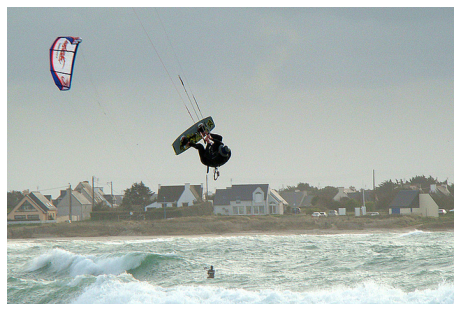

In [21]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[508910, 1342996, 1347500, 1349978, 1354793, 1358570, 1779263, 2021158, 2089641, 2181820]
10


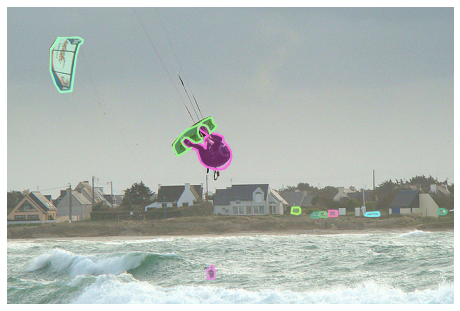

In [23]:
#import json
#print(json.dumps(cats,indent=2))
plt.imshow(I); plt.axis('off') #This is needed
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
#There are multiple annotations because multiple objects are segmented
print(annIds)
print(len(annIds))
coco.showAnns(anns)

In [96]:
print(anns)

[{'segmentation': [[253.85, 187.23, 250.82, 193.01, 255.22, 199.6, 260.99, 202.35, 270.89, 204.55, 273.64, 211.15, 277.21, 222.15, 284.09, 228.47, 293.71, 232.04, 303.06, 233.14, 311.03, 231.77, 317.9, 224.9, 320.93, 215.55, 320.1, 206.48, 315.43, 199.05, 310.2, 193.56, 308.83, 186.13, 299.48, 182.28, 294.81, 182.01, 288.49, 175.96, 284.09, 169.36, 273.64, 168.26, 273.09, 172.94, 277.49, 177.34, 283.81, 181.46, 287.94, 184.48, 283.26, 188.06, 281.61, 190.53, 283.54, 196.58, 284.36, 202.9, 279.96, 198.5, 272.54, 194.93, 266.77, 195.21, 265.12, 194.38, 259.89, 189.43, 254.12, 186.96]], 'area': 2188.0864999999994, 'iscrowd': 0, 'image_id': 532481, 'bbox': [250.82, 168.26, 70.11, 64.88], 'category_id': 1, 'id': 508910}, {'segmentation': [[446.65, 301.37, 437.02, 302.04, 436.02, 301.54, 435.35, 297.72, 438.34, 296.89, 438.68, 294.73, 447.15, 294.23, 448.81, 298.05, 448.48, 301.04]], 'area': 82.66089999999997, 'iscrowd': 0, 'image_id': 532481, 'bbox': [435.35, 294.23, 13.46, 7.81], 'category